<a href="https://colab.research.google.com/github/nadairshaid/big-pandas-MIT/blob/decision_tree/Copy_of_Decision_Tree_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing and Mounting**

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# Setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    classification_report,
    precision_recall_curve
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression

# To build classification models 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# For tuning the model
from sklearn.model_selection import GridSearchCV

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

In [28]:
path = '/Users/andrescervantes/Library/CloudStorage/OneDrive-Personal/03_MIT_IDSS/09_hackathon/Traveldata_train.csv'
travel_train = pd.read_csv(path)

path = '/Users/andrescervantes/Library/CloudStorage/OneDrive-Personal/03_MIT_IDSS/09_hackathon/surveydata_train.csv'
survey_train = pd.read_csv(path)

path = '/Users/andrescervantes/Library/CloudStorage/OneDrive-Personal/03_MIT_IDSS/09_hackathon/Traveldata_test.csv'
travel_test = pd.read_csv(path)

path = '/Users/andrescervantes/Library/CloudStorage/OneDrive-Personal/03_MIT_IDSS/09_hackathon/surveydata_test.csv'
survey_test = pd.read_csv(path)

In [ ]:
#Importing data
survey_train = pd.read_csv('/content/drive/MyDrive/MITHackathon/Surveydata_train.csv') 
survey_test = pd.read_csv('/content/drive/MyDrive/MITHackathon/Surveydata_test.csv') 
travel_train = pd.read_csv('/content/drive/MyDrive/MITHackathon/Traveldata_train.csv') 
travel_test = pd.read_csv('/content/drive/MyDrive/MITHackathon/Traveldata_test.csv') 


**Getting Info**

In [29]:
survey_train.shape


(94379, 17)

In [30]:
survey_train.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [31]:
survey_train.tail()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
94374,98894375,0,Poor,Ordinary,Good,Good,Convenient,Poor,Poor,Poor,Poor,Good,Good,Good,Needs Improvement,Good,Poor
94375,98894376,1,Good,Ordinary,Good,Good,Convenient,Needs Improvement,Excellent,Excellent,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Good
94376,98894377,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Acceptable,Good,Acceptable
94377,98894378,0,Needs Improvement,Ordinary,NaN,Needs Improvement,Convenient,Good,Needs Improvement,Good,Good,Acceptable,Good,Good,Good,Excellent,Good
94378,98894379,0,Acceptable,Ordinary,Poor,Acceptable,Manageable,Acceptable,Acceptable,Acceptable,Acceptable,Poor,Good,Good,Poor,Good,Acceptable


In [32]:
survey_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

In [33]:
travel_train.shape

(94379, 9)

In [34]:
travel_train.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.00000,NaN,Business,272,0.00000,5.00000
1,98800002,Male,Loyal Customer,48.00000,Personal Travel,Eco,2200,9.00000,0.00000
2,98800003,Female,Loyal Customer,43.00000,Business Travel,Business,1061,77.00000,119.00000
3,98800004,Female,Loyal Customer,44.00000,Business Travel,Business,780,13.00000,18.00000
4,98800005,Female,Loyal Customer,50.00000,Business Travel,Business,1981,0.00000,0.00000


In [35]:
travel_train.tail()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
94374,98894375,Male,Loyal Customer,32.00000,Business Travel,Business,1357,83.00000,125.00000
94375,98894376,Male,Loyal Customer,44.00000,Business Travel,Business,592,5.00000,11.00000
94376,98894377,Male,NaN,63.00000,Business Travel,Business,2794,0.00000,0.00000
94377,98894378,Male,Loyal Customer,16.00000,Personal Travel,Eco,2744,0.00000,0.00000
94378,98894379,Male,Loyal Customer,54.00000,NaN,Eco,2107,28.00000,28.00000


In [36]:
travel_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


**Merging Data Frames**

In [4]:
df = travel_train.merge(survey_train, how='outer', on= 'ID', indicator= True)

In [5]:
df

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,_merge
0,98800001,Female,Loyal Customer,52.00000,NaN,Business,272,0.00000,5.00000,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor,both
1,98800002,Male,Loyal Customer,48.00000,Personal Travel,Eco,2200,9.00000,0.00000,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good,both
2,98800003,Female,Loyal Customer,43.00000,Business Travel,Business,1061,77.00000,119.00000,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent,both
3,98800004,Female,Loyal Customer,44.00000,Business Travel,Business,780,13.00000,18.00000,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable,both
4,98800005,Female,Loyal Customer,50.00000,Business Travel,Business,1981,0.00000,0.00000,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,98894375,Male,Loyal Customer,32.00000,Business Travel,Business,1357,83.00000,125.00000,0,Poor,Ordinary,Good,Good,Convenient,Poor,Poor,Poor,Poor,Good,Good,Good,Needs Improvement,Good,Poor,both
94375,98894376,Male,Loyal Customer,44.00000,Business Travel,Business,592,5.00000,11.00000,1,Good,Ordinary,Good,Good,Convenient,Needs Improvement,Excellent,Excellent,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Good,both
94376,98894377,Male,NaN,63.00000,Business Travel,Business,2794,0.00000,0.00000,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Acceptable,Good,Acceptable,both
94377,98894378,Male,Loyal Customer,16.00000,Personal Travel,Eco,2744,0.00000,0.00000,0,Needs Improvement,Ordinary,NaN,Needs Improvement,Convenient,Good,Needs Improvement,Good,Good,Acceptable,Good,Good,Good,Excellent,Good,both


In [6]:

num_cols = df.describe().columns.tolist()
cat_cols = df.describe(include='object').columns.tolist()

In [7]:
df.isna().sum().sort_values(ascending=False)

Type_Travel                9226
Customer_Type              8951
Arrival_Time_Convenient    8930
Catering                   8741
Onboard_Service            7601
Arrival_Delay_in_Mins       357
Baggage_Handling            142
Online_Support               91
Legroom                      90
CheckIn_Service              77
Gender                       77
Ease_of_Online_Booking       73
Seat_Comfort                 61
Departure_Delay_in_Mins      57
Age                          33
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Boarding               6
Cleanliness                   6
ID                            0
Seat_Class                    0
Overall_Experience            0
Travel_Distance               0
Travel_Class                  0
_merge                        0
dtype: int64

In [8]:
nona_df = df.copy()

In [9]:
df=df.drop(['_merge','ID'],axis=1)

In [10]:
def fill_nas_with_mode(df, col):
    mode = df[col].mode().iloc[0]
    df[col].fillna(mode, inplace=True)

def fill_nas_with_median(df, col):
    median = df[col].median()
    df[col].fillna(median, inplace=True)

for col in cat_cols:
    fill_nas_with_mode(nona_df, col)

for col in num_cols:
    fill_nas_with_median(nona_df, col)


In [11]:
# Creating list of dummy columns
nona_df.drop(columns=['ID','_merge'], inplace=True)
dumm_df = pd.get_dummies(nona_df, drop_first=True)

dumm_df.columns = dumm_df.columns.str.strip()
dumm_df.columns = dumm_df.columns.str.replace(' ', '_')

# scaling the data
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(dumm_df), columns=dumm_df.columns)


In [12]:
scaled_df.head()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Gender_Male,Customer_Type_Loyal_Customer,Type_Travel_Personal_Travel,Travel_Class_Eco,Seat_Comfort_Excellent,Seat_Comfort_Extremely_Poor,Seat_Comfort_Good,Seat_Comfort_Needs_Improvement,Seat_Comfort_Poor,Seat_Class_Ordinary,Arrival_Time_Convenient_Excellent,Arrival_Time_Convenient_Extremely_Poor,Arrival_Time_Convenient_Good,Arrival_Time_Convenient_Needs_Improvement,Arrival_Time_Convenient_Poor,Catering_Excellent,Catering_Extremely_Poor,Catering_Good,Catering_Needs_Improvement,Catering_Poor,Platform_Location_Inconvenient,Platform_Location_Manageable,Platform_Location_Needs_Improvement,Platform_Location_Very_Convenient,Platform_Location_Very_Inconvenient,Onboard_Wifi_Service_Excellent,Onboard_Wifi_Service_Extremely_Poor,Onboard_Wifi_Service_Good,Onboard_Wifi_Service_Needs_Improvement,Onboard_Wifi_Service_Poor,Onboard_Entertainment_Excellent,Onboard_Entertainment_Extremely_Poor,Onboard_Entertainment_Good,Onboard_Entertainment_Needs_Improvement,Onboard_Entertainment_Poor,Online_Support_Excellent,Online_Support_Extremely_Poor,Online_Support_Good,Online_Support_Needs_Improvement,Online_Support_Poor,Ease_of_Online_Booking_Excellent,Ease_of_Online_Booking_Extremely_Poor,Ease_of_Online_Booking_Good,Ease_of_Online_Booking_Needs_Improvement,Ease_of_Online_Booking_Poor,Onboard_Service_Excellent,Onboard_Service_Extremely_Poor,Onboard_Service_Good,Onboard_Service_Needs_Improvement,Onboard_Service_Poor,Legroom_Excellent,Legroom_Extremely_Poor,Legroom_Good,Legroom_Needs_Improvement,Legroom_Poor,Baggage_Handling_Excellent,Baggage_Handling_Good,Baggage_Handling_Needs_Improvement,Baggage_Handling_Poor,CheckIn_Service_Excellent,CheckIn_Service_Extremely_Poor,CheckIn_Service_Good,CheckIn_Service_Needs_Improvement,CheckIn_Service_Poor,Cleanliness_Excellent,Cleanliness_Extremely_Poor,Cleanliness_Good,Cleanliness_Needs_Improvement,Cleanliness_Poor,Online_Boarding_Excellent,Online_Boarding_Extremely_Poor,Online_Boarding_Good,Online_Boarding_Needs_Improvement,Online_Boarding_Poor
0,0.83236,-1.66047,-0.38392,-0.25923,-1.09811,-0.98522,0.44508,-0.62541,-1.04670,-0.39917,-0.19517,-0.52832,1.87238,-0.43789,-0.99481,2.08254,-0.21934,-0.65780,-0.43453,-0.41194,2.45243,-0.20789,-0.48494,-0.48509,-0.41485,-0.45943,-0.58727,-0.48265,2.39802,-0.00460,-0.53444,-0.03107,1.76852,-0.51190,-0.35836,-0.54550,-0.15246,-0.69039,2.40358,-0.31746,-0.61490,-0.00326,-0.68442,-0.39087,-0.34746,-0.59610,-0.01302,-0.66571,2.34911,-0.33977,-0.53942,-0.00651,-0.76541,2.69928,-0.32019,-0.59754,-0.06013,-0.66535,-0.44761,-0.30661,-0.61668,-0.76925,2.94465,-0.25504,-0.51264,-0.00326,1.59715,-0.36728,-0.36577,-0.61750,-0.00728,-0.77531,2.93677,-0.25194,-0.54711,-0.01128,-0.60909,-0.40769,2.73073
1,0.56770,0.21510,-0.14787,-0.38951,-1.09811,1.01500,0.44508,1.59895,0.95538,-0.39917,-0.19517,-0.52832,-0.53408,2.28370,1.00522,2.08254,-0.21934,-0.65780,-0.43453,-0.41194,-0.40776,-0.20789,-0.48494,-0.48509,2.41048,-0.45943,-0.58727,2.07188,-0.41701,-0.00460,-0.53444,-0.03107,1.76852,-0.51190,-0.35836,-0.54550,-0.15246,-0.69039,-0.41605,3.14996,-0.61490,-0.00326,1.46109,-0.39087,-0.34746,-0.59610,-0.01302,1.50215,-0.42569,-0.33977,1.85385,-0.00651,-0.76541,-0.37047,-0.32019,-0.59754,-0.06013,-0.66535,2.23409,-0.30661,-0.61668,-0.76925,-0.33960,3.92095,-0.51264,-0.00326,-0.62612,2.72271,-0.36577,-0.61750,-0.00728,1.28980,-0.34051,-0.25194,-0.54711,-0.01128,1.64179,-0.40769,-0.36620
2,0.23688,-0.89293,1.63556,2.71126,0.91066,-0.98522,0.44508,-0.62541,-1.04670,-0.39917,-0.19517,-0.52832,1.87238,-0.43789,-0.99481,-0.48018,-0.21934,-0.65780,2.30133,-0.41194,-0.40776,-0.20789,-0.48494,2.06148,-0.41485,-0.45943,-0.58727,2.07188,-0.41701,-0.00460,-0.53444,-0.03107,-0.56544,1.95352,-0.35836,-0.54550,-0.15246,1.44846,-0.41605,-0.31746,1.62629,-0.00326,-0.68442,-0.39087,-0.34746,1.67756,-0.01302,-0.66571,-0.42569,-0.33977,1.85385,-0.00651,-0.76541,-0.37047,-0.32019,1.67353,-0.06013,-0.66535,-0.44761,-0.30661,1.62159

In [13]:
dumm_df.head()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Gender_Male,Customer_Type_Loyal_Customer,Type_Travel_Personal_Travel,Travel_Class_Eco,Seat_Comfort_Excellent,Seat_Comfort_Extremely_Poor,Seat_Comfort_Good,Seat_Comfort_Needs_Improvement,Seat_Comfort_Poor,Seat_Class_Ordinary,Arrival_Time_Convenient_Excellent,Arrival_Time_Convenient_Extremely_Poor,Arrival_Time_Convenient_Good,Arrival_Time_Convenient_Needs_Improvement,Arrival_Time_Convenient_Poor,Catering_Excellent,Catering_Extremely_Poor,Catering_Good,Catering_Needs_Improvement,Catering_Poor,Platform_Location_Inconvenient,Platform_Location_Manageable,Platform_Location_Needs_Improvement,Platform_Location_Very_Convenient,Platform_Location_Very_Inconvenient,Onboard_Wifi_Service_Excellent,Onboard_Wifi_Service_Extremely_Poor,Onboard_Wifi_Service_Good,Onboard_Wifi_Service_Needs_Improvement,Onboard_Wifi_Service_Poor,Onboard_Entertainment_Excellent,Onboard_Entertainment_Extremely_Poor,Onboard_Entertainment_Good,Onboard_Entertainment_Needs_Improvement,Onboard_Entertainment_Poor,Online_Support_Excellent,Online_Support_Extremely_Poor,Online_Support_Good,Online_Support_Needs_Improvement,Online_Support_Poor,Ease_of_Online_Booking_Excellent,Ease_of_Online_Booking_Extremely_Poor,Ease_of_Online_Booking_Good,Ease_of_Online_Booking_Needs_Improvement,Ease_of_Online_Booking_Poor,Onboard_Service_Excellent,Onboard_Service_Extremely_Poor,Onboard_Service_Good,Onboard_Service_Needs_Improvement,Onboard_Service_Poor,Legroom_Excellent,Legroom_Extremely_Poor,Legroom_Good,Legroom_Needs_Improvement,Legroom_Poor,Baggage_Handling_Excellent,Baggage_Handling_Good,Baggage_Handling_Needs_Improvement,Baggage_Handling_Poor,CheckIn_Service_Excellent,CheckIn_Service_Extremely_Poor,CheckIn_Service_Good,CheckIn_Service_Needs_Improvement,CheckIn_Service_Poor,Cleanliness_Excellent,Cleanliness_Extremely_Poor,Cleanliness_Good,Cleanliness_Needs_Improvement,Cleanliness_Poor,Online_Boarding_Excellent,Online_Boarding_Extremely_Poor,Online_Boarding_Good,Online_Boarding_Needs_Improvement,Online_Boarding_Poor
0,52.00000,272,0.00000,5.00000,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,48.00000,2200,9.00000,0.00000,0,1,1,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
2,43.00000,1061,77.00000,119.00000,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
3,44.00000,780,13.00000,18.00000,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,50.00000,1981,0.00000,0.00000,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [14]:
Y= dumm_df.Overall_Experience
X= dumm_df.drop(columns = ['Overall_Experience'])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

In [16]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Attrite', 'Attrite'], yticklabels=['Not Attrite', 'Attrite'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

**Decision Tree**

In [17]:
X_train

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender_Male,Customer_Type_Loyal_Customer,Type_Travel_Personal_Travel,Travel_Class_Eco,Seat_Comfort_Excellent,Seat_Comfort_Extremely_Poor,Seat_Comfort_Good,Seat_Comfort_Needs_Improvement,Seat_Comfort_Poor,Seat_Class_Ordinary,Arrival_Time_Convenient_Excellent,Arrival_Time_Convenient_Extremely_Poor,Arrival_Time_Convenient_Good,Arrival_Time_Convenient_Needs_Improvement,Arrival_Time_Convenient_Poor,Catering_Excellent,Catering_Extremely_Poor,Catering_Good,Catering_Needs_Improvement,Catering_Poor,Platform_Location_Inconvenient,Platform_Location_Manageable,Platform_Location_Needs_Improvement,Platform_Location_Very_Convenient,Platform_Location_Very_Inconvenient,Onboard_Wifi_Service_Excellent,Onboard_Wifi_Service_Extremely_Poor,Onboard_Wifi_Service_Good,Onboard_Wifi_Service_Needs_Improvement,Onboard_Wifi_Service_Poor,Onboard_Entertainment_Excellent,Onboard_Entertainment_Extremely_Poor,Onboard_Entertainment_Good,Onboard_Entertainment_Needs_Improvement,Onboard_Entertainment_Poor,Online_Support_Excellent,Online_Support_Extremely_Poor,Online_Support_Good,Online_Support_Needs_Improvement,Online_Support_Poor,Ease_of_Online_Booking_Excellent,Ease_of_Online_Booking_Extremely_Poor,Ease_of_Online_Booking_Good,Ease_of_Online_Booking_Needs_Improvement,Ease_of_Online_Booking_Poor,Onboard_Service_Excellent,Onboard_Service_Extremely_Poor,Onboard_Service_Good,Onboard_Service_Needs_Improvement,Onboard_Service_Poor,Legroom_Excellent,Legroom_Extremely_Poor,Legroom_Good,Legroom_Needs_Improvement,Legroom_Poor,Baggage_Handling_Excellent,Baggage_Handling_Good,Baggage_Handling_Needs_Improvement,Baggage_Handling_Poor,CheckIn_Service_Excellent,CheckIn_Service_Extremely_Poor,CheckIn_Service_Good,CheckIn_Service_Needs_Improvement,CheckIn_Service_Poor,Cleanliness_Excellent,Cleanliness_Extremely_Poor,Cleanliness_Good,Cleanliness_Needs_Improvement,Cleanliness_Poor,Online_Boarding_Excellent,Online_Boarding_Extremely_Poor,Online_Boarding_Good,Online_Boarding_Needs_Improvement,Online_Boarding_Poor
90112,49.00000,2023,64.00000,56.00000,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
54258,45.00000,4879,160.00000,146.00000,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
58136,25.00000,3779,0.00000,0.00000,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
23288,21.00000,1928,0.00000,20.00000,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
31834,35.00000,2331,2.00000,1.00000,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7580,57.00000,741,12.00000,0.00000,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
86702,34.00000,87,0.00000,0.00000,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
36613,54.00000,62,0.00000,0.00000,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
529,35.00000,1227,14.00000,14.00000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,

In [18]:
y_train

90112    1
54258    0
58136    0
23288    1
31834    0
        ..
7580     1
86702    1
36613    1
529      0
68264    0
Name: Overall_Experience, Length: 66065, dtype: int64

In [19]:
dt = DecisionTreeClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)


In [20]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29950
           1       1.00      1.00      1.00     36115

    accuracy                           1.00     66065
   macro avg       1.00      1.00      1.00     66065
weighted avg       1.00      1.00      1.00     66065



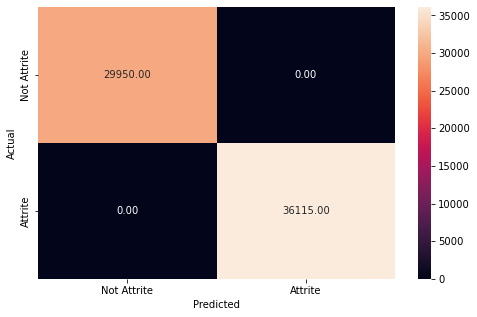

In [21]:
y_train_pred_dt = dt.predict(X_train)

metrics_score(y_train, y_train_pred_dt)


              precision    recall  f1-score   support

           0       0.91      0.92      0.91     12836
           1       0.93      0.92      0.93     15478

    accuracy                           0.92     28314
   macro avg       0.92      0.92      0.92     28314
weighted avg       0.92      0.92      0.92     28314



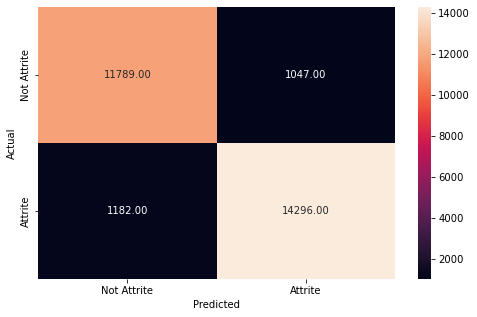

In [22]:
y_test_pred_dt = dt.predict(X_test)

metrics_score(y_test, y_test_pred_dt)


<AxesSubplot:xlabel='Importance'>

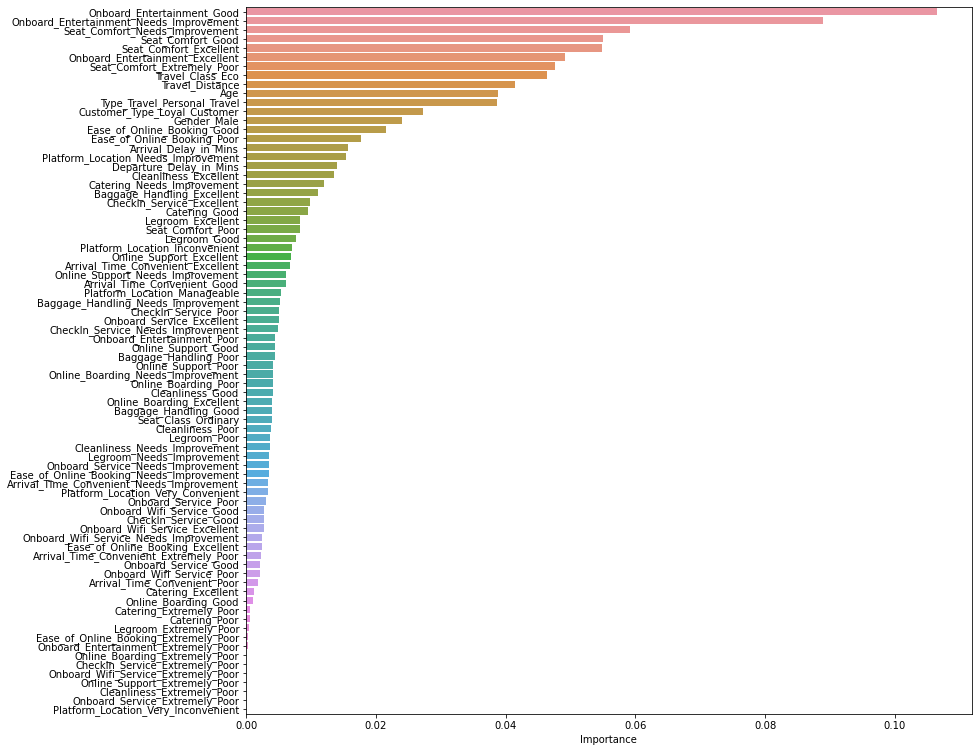

In [23]:
importances = dt.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance,importance_df.index)


In [24]:
features = list(X.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()


NameError: name 'tree' is not defined

<Figure size 2160x1440 with 0 Axes>

**Using Random Forest**

In [ ]:
# Fitting the Random Forest classifier on the training data
rf_estimator = RandomForestClassifier(class_weight = {0: 0.17, 1: 0.83}, random_state = 1)

rf_estimator.fit(X_train, y_train)


In [ ]:
# Checking performance on the training data
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)


In [25]:
# Checking performance on the testing data
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)


NameError: name 'rf_estimator' is not defined

In [26]:
importances = rf_estimator.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(importance_df.Importance, importance_df.index)


NameError: name 'rf_estimator' is not defined

SVM with RBF kernel has good recall among all the models and Random Forest, has less recall compared to SVM but F1 Score, Accuracy and Precision values are good in case of Random Forest. It may be possible to further try and tune the model, and the HR department can use this model to predict whether an employee is at risk of attrition or not.


# Making submissions

In [39]:
# merging data
test_df = travel_test.merge(survey_test, how='outer', on='ID', indicator=True)
test_df.tail()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding,_merge
35597,99935598,Male,Loyal Customer,8.00000,Personal Travel,Eco,1334,0.00000,0.00000,Needs Improvement,Green Car,Excellent,Needs Improvement,Manageable,Acceptable,Needs Improvement,Acceptable,Acceptable,Good,Excellent,Good,Acceptable,Good,Acceptable,both
35598,99935599,Female,Loyal Customer,53.00000,Business Travel,Business,1772,0.00000,0.00000,Needs Improvement,Ordinary,Needs Improvement,Good,Needs Improvement,Acceptable,Excellent,Excellent,Good,Good,Good,Good,Acceptable,Good,Good,both
35599,99935600,Male,Disloyal Customer,22.00000,Business Travel,Eco,1180,0.00000,0.00000,Good,Green Car,Extremely Poor,Good,Needs Improvement,Needs Improvement,Good,Poor,Needs Improvement,Poor,Acceptable,Poor,Poor,Excellent,Needs Improvement,both
35600,99935601,Female,Loyal Customer,67.00000,Personal Travel,Eco,420,23.00000,16.00000,Excellent,Ordinary,Excellent,Excellent,Inconvenient,Acceptable,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Acceptable,Excellent,Good,both
35601,99935602,Male,NaN,20.00000,Personal Travel,Eco,1680,0.00000,0.00000,Good,Ordinary,Acceptable,Good,Manageable,Poor,Good,Poor,Poor,Acceptable,Good,Good,Needs Improvement,Good,Poor,both


In [40]:
num_cols = test_df.describe().columns.tolist()
cat_cols = test_df.describe(include='object').columns.tolist()

In [49]:
cat_cols

['Gender',
 'Customer_Type',
 'Type_Travel',
 'Travel_Class',
 'Seat_Comfort',
 'Seat_Class',
 'Arrival_Time_Convenient',
 'Catering',
 'Platform_Location',
 'Onboard_Wifi_Service',
 'Onboard_Entertainment',
 'Online_Support',
 'Ease_of_Online_Booking',
 'Onboard_Service',
 'Legroom',
 'Baggage_Handling',
 'CheckIn_Service',
 'Cleanliness',
 'Online_Boarding']

In [48]:
num_cols

['ID',
 'Age',
 'Travel_Distance',
 'Departure_Delay_in_Mins',
 'Arrival_Delay_in_Mins']

In [41]:
# filling NAs
nona_df = test_df.copy()

def fill_nas_with_mode(df, col):
    mode = df[col].mode().iloc[0]
    df[col].fillna(mode, inplace=True)

def fill_nas_with_median(df, col):
    median = df[col].median()
    df[col].fillna(median, inplace=True)

for col in cat_cols:
    fill_nas_with_mode(nona_df, col)

for col in num_cols:
    fill_nas_with_median(nona_df, col)

In [43]:
# dummy variables

dumm_df = nona_df.drop(columns=['ID','_merge'])

dumm_df = pd.get_dummies(dumm_df, drop_first=True)

dumm_df.columns = dumm_df.columns.str.strip()
dumm_df.columns = dumm_df.columns.str.replace(' ', '_')

In [44]:
# scaling the data

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(dumm_df), columns=dumm_df.columns)
scaled_df.head()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Gender_Male,Customer_Type_Loyal_Customer,Type_Travel_Personal_Travel,Travel_Class_Eco,Seat_Comfort_Excellent,Seat_Comfort_Extremely_Poor,Seat_Comfort_Good,Seat_Comfort_Needs_Improvement,Seat_Comfort_Poor,Seat_Class_Ordinary,Arrival_Time_Convenient_Excellent,Arrival_Time_Convenient_Extremely_Poor,Arrival_Time_Convenient_Good,Arrival_Time_Convenient_Needs_Improvement,Arrival_Time_Convenient_Poor,Catering_Excellent,Catering_Extremely_Poor,Catering_Good,Catering_Needs_Improvement,Catering_Poor,Platform_Location_Inconvenient,Platform_Location_Manageable,Platform_Location_Needs_Improvement,Platform_Location_Very_Convenient,Onboard_Wifi_Service_Excellent,Onboard_Wifi_Service_Extremely_Poor,Onboard_Wifi_Service_Good,Onboard_Wifi_Service_Needs_Improvement,Onboard_Wifi_Service_Poor,Onboard_Entertainment_Excellent,Onboard_Entertainment_Extremely_Poor,Onboard_Entertainment_Good,Onboard_Entertainment_Needs_Improvement,Onboard_Entertainment_Poor,Online_Support_Excellent,Online_Support_Good,Online_Support_Needs_Improvement,Online_Support_Poor,Ease_of_Online_Booking_Excellent,Ease_of_Online_Booking_Extremely_Poor,Ease_of_Online_Booking_Good,Ease_of_Online_Booking_Needs_Improvement,Ease_of_Online_Booking_Poor,Onboard_Service_Excellent,Onboard_Service_Good,Onboard_Service_Needs_Improvement,Onboard_Service_Poor,Legroom_Excellent,Legroom_Extremely_Poor,Legroom_Good,Legroom_Needs_Improvement,Legroom_Poor,Baggage_Handling_Excellent,Baggage_Handling_Good,Baggage_Handling_Needs_Improvement,Baggage_Handling_Poor,CheckIn_Service_Excellent,CheckIn_Service_Good,CheckIn_Service_Needs_Improvement,CheckIn_Service_Poor,Cleanliness_Excellent,Cleanliness_Good,Cleanliness_Needs_Improvement,Cleanliness_Poor,Online_Boarding_Excellent,Online_Boarding_Extremely_Poor,Online_Boarding_Good,Online_Boarding_Needs_Improvement,Online_Boarding_Poor
0,-0.22776,-1.42064,-0.39250,-0.39652,-0.98340,0.44433,-0.61807,-1.03849,-0.39732,-0.19692,-0.53002,-0.53102,-0.43911,-1.00332,-0.47656,-0.22171,-0.65489,-0.43587,-0.41035,-0.40539,-0.21024,-0.48152,-0.48152,-0.41255,-0.45624,1.67247,-0.48161,-0.41408,-0.53293,-0.03396,-0.57106,1.94292,-0.35477,1.82745,-0.15478,-0.68827,-0.41724,-0.31248,-0.61044,1.44649,-0.39262,-0.34399,1.67198,-0.00750,-0.67056,-0.42625,-0.33922,1.86636,-0.76272,-0.37479,-0.32557,1.65331,-0.05387,-0.66282,-0.44985,-0.30472,1.63076,-0.77368,-0.33845,-0.25664,-0.51115,1.59962,-0.36877,-0.36675,1.61126,-0.77795,-0.33576,-0.25276,-0.54920,-0.00750,-0.61117,-0.41049,2.73030
1,-1.21884,-0.54882,-0.15492,0.33123,-0.98340,-2.25057,-0.61807,-1.03849,-0.39732,5.07824,-0.53002,-0.53102,-0.43911,0.99669,-0.47656,-0.22171,1.52697,-0.43587,-0.41035,-0.40539,-0.21024,-0.48152,-0.48152,2.42397,-0.45624,1.67247,-0.48161,-0.41408,-0.53293,-0.03396,-0.57106,-0.51469,-0.35477,-0.54721,-0.15478,-0.68827,-0.41724,3.20024,-0.61044,-0.69133,-0.39262,-0.34399,-0.59809,-0.00750,-0.67056,-0.42625,-0.33922,1.86636,-0.76272,-0.37479,-0.32557,-0.60485,-0.05387,-0.66282,-0.44985,-0.30472,-0.61321,1.29252,-0.33845,-0.25664,-0.51115,-0.62515,-0.36877,-0.36675,1.61126,-0.77795,-0.33576,-0.25276,-0.54920,-0.00750,-0.61117,-0.41049,-0.36626
2,1.35797,0.82481,-0.39250,-0.39652,1.01688,0.44433,-0.61807,-1.03849,2.51686,-0.19692,-0.53002,-0.53102,-0.43911,0.99669,2.09839,-0.22171,-0.65489,-0.43587,-0.41035,2.46677,-0.21024,-0.48152,-0.48152,-0.41255,-0.45624,-0.59792,-0.48161,2.41497,1.87640,-0.03396,-0.57106,-0.51469,-0.35477,1.82745,-0.15478,-0.68827,-0.41724,-0.31248,1.63817,-0.69133,-0.39262,-0.34399,-0.59809,-0.00750,-0.67056,2.34603,-0.33922,-0.53580,-0.76272,2.66815,-0.32557,-0.60485,-0.05387,-0.66282,2.22297,-0.30472,-0.61321,-0.77368,2.95465,-0.25664,-0.51115,1.59962,-0.36877,-0.36675,-0.62063,-0.77795,2.97830,-0.25276,1.82082,-0.00750,-0.61117,-0.41049,-0.36626
3,-0.69027,-0.62009,-0.39250,-0.39652,-0.98340,0.44433,1.61794,0.96294,-0.39732,-0.19692,-0.53002,-0.53102,-0.43911,-1.00332,2.09839,-0.22171,-0.65489,-0.43587,-0.

In [45]:
X = scaled_df

In [47]:
dt.predict(X)

ValueError: X has 73 features, but DecisionTreeClassifier is expecting 78 features as input.